In [1]:
import os

import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
CITIES = ['bay_area', 'nyc', 'london', 'dc', 'la', 'toronto', 'atlanta', 'chicago', 'seattle', 'sydney', 'melbourne', 'boston', 'austin']

In [3]:
def load_vocab(file, threshold=3):
    lines = open(file, 'r').readlines()
    vocab = {}
    for line in lines:
        word, c = line[:-1].split('\t')
        c = int(c)
        if c < threshold:
            break
        vocab[word] = c
    return vocab

In [4]:
def pretty_barplot(y_pos, values, objects, xlabel, title, outfile):
    fig = plt.figure(figsize=(10, 6))
    plt.rcParams['axes.edgecolor']='#333F4B'
    plt.rcParams['axes.linewidth']=0.8
    plt.rcParams['xtick.color']='#333F4B'
    plt.rcParams['ytick.color']='#333F4B'

    plt.barh(y_pos, values, align='center', color='#007acc', alpha=0.6)
    plt.yticks(y_pos, objects)
    plt.xlabel(xlabel, fontsize=8, fontweight='black', color='#333F4B')
    plt.title(title, fontsize=15, fontweight='black', color='#333F4B')

    plt.savefig(outfile)
    plt.show()
    plt.clf()

In [5]:
vocab_fold = 'vocabs'
vocabs, totals = {'bios': {}, 'tweets': {}}, {'bios': {}, 'tweets':{}}

for sub in ['bios', 'tweets']:
    for city in CITIES + ['other']:
        vocabs[sub][city] = load_vocab('{}/{}/{}.vocab'.format(vocab_fold, sub, city), 1)
        totals[sub][city] = sum(vocabs[sub][city].values())

In [6]:
def get_normalized_values(kw, vocabs, totals):
    values = []
    for city in vocabs:
        if not kw in vocabs[city]:
            values.append(0)
        else:
            values.append(vocabs[city][kw] / totals[city])
    
    return values

def compare_two_keywords(sub, kw1, kw2, cities=CITIES + ['other']):
    kw1, kw2 = kw1.lower(), kw2.lower()
    values1 = get_normalized_values(kw1, vocabs[sub], totals[sub])
    values2 = get_normalized_values(kw2, vocabs[sub], totals[sub])
    sums = [values1[i] + values2[i] for i in range(len(values1))]
    values1 = [values1[i] / sums[i] * 100 for i in range(len(values1))]
    values2 = [values2[i] / sums[i] * 100 for i in range(len(values2))]

    width = 0.35    
    ind1 = [i for i in range(len(values1))]
    ind2 = [i + width for i in range(len(values2))]

    fig = plt.figure(figsize=(15, 10))
    p1 = plt.bar(ind1, values1, width)
    p2 = plt.bar(ind2, values2, width)

    plt.ylabel('Percentage')
    plt.title('{} vs {} in {}'.format(kw1, kw2, sub).upper())
    plt.xticks([i + width * 0.5 for i in ind1], cities)
    plt.legend((p1[0], p2[0]), (kw1, kw2))
    plt.show()

In [7]:
def rank_keywords_in_city(sub, keywords, outfold='images/keywords_in_city', cities=CITIES + ['other']):
    outfold = os.path.join(outfold, sub)
    os.makedirs(outfold, exist_ok=True)
    y_pos = [i for i in range(len(keywords))]
    
    for city in cities:
        values = {}
        
        for kw in keywords:
            if not kw in vocabs[sub][city]:
                values[kw] = 0
            else:
                values[kw] = vocabs[sub][city][kw] / totals[sub][city]

        maxv = max(values.values())
        factor = maxv / 1000
        values = {city: int(values[city] / factor) for city in values}

        sorted_keywords, counts = [], []

        for kw in sorted(values, key=values.get, reverse=True):
            sorted_keywords.append(kw)
            counts.append(values[kw])

        pretty_barplot(y_pos, counts, sorted_keywords, 'NORMALIZED COUNT', 
                    'KEYWORD COUNT FOR {} IN {}'.format(sub.upper(), city.upper()),
                    '{}/{}'.format(outfold, city))

In [8]:
def rank_cities_by_keyword(sub, keywords, outfold='images/cities_by_keyword', cities=CITIES + ['other']):
    outfold = os.path.join(outfold, sub)
    os.makedirs(outfold, exist_ok=True)
    y_pos = [i for i in range(len(cities))]

    for keyword in keywords:
        keyword = keyword.lower()
        ratios = {}
        for city in vocabs[sub]:
            if not keyword in vocabs[sub][city]:
                ratio = 0
            else:
                ratio = vocabs[sub][city][keyword] / totals[sub][city]
            ratios[city] = ratio * 100

        city_names, percents = [], []
        for city in sorted(ratios, key=ratios.get, reverse=True):
            city_names.append(city.upper())
            percents.append(ratios[city])
        
        pretty_barplot(y_pos, percents, city_names, 'FREQUENCY (%)', 
                      '{} WITH KEYWORD: {}'.format(sub.upper(), keyword.upper()),
                      '{}/{}'.format(outfold, keyword))


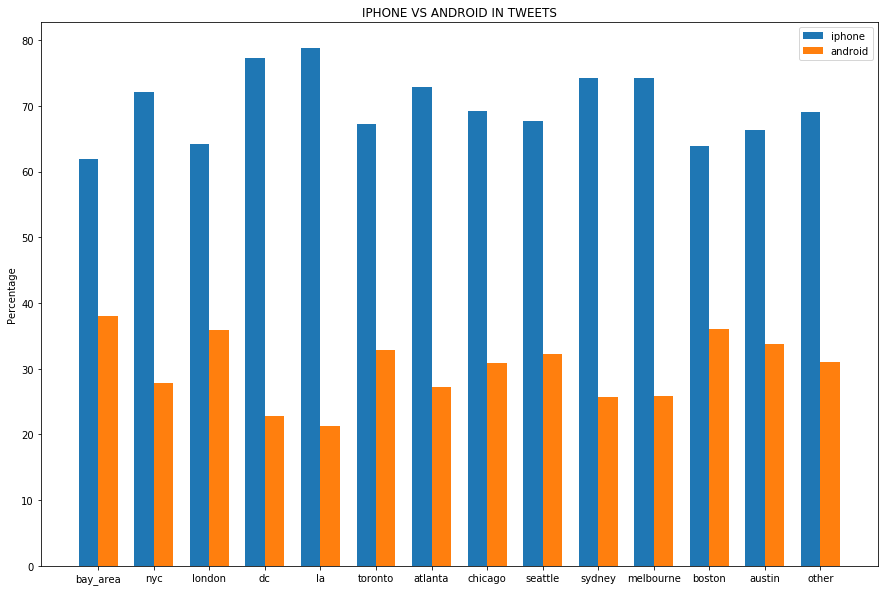

In [9]:
compare_two_keywords('tweets', 'iphone', 'android')

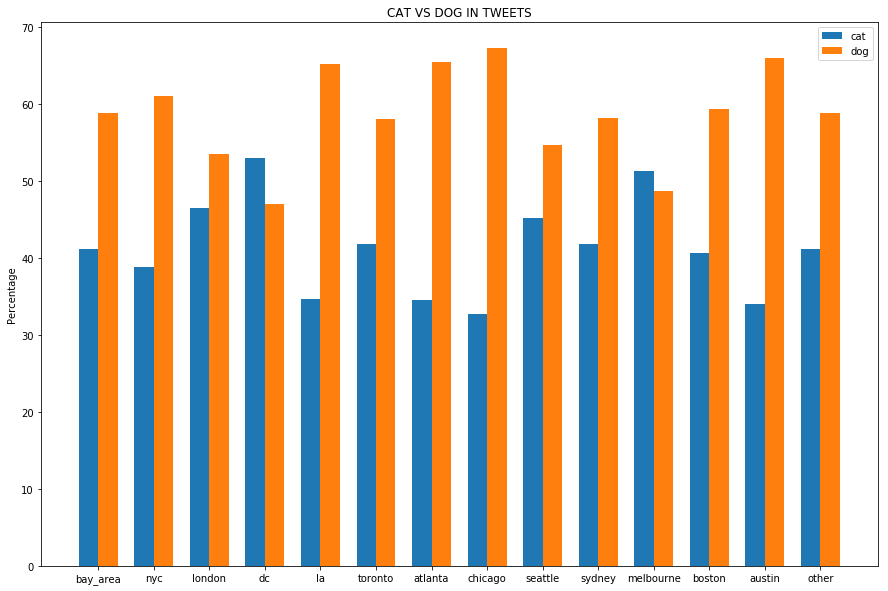

In [10]:
compare_two_keywords('tweets', 'cat', 'dog')

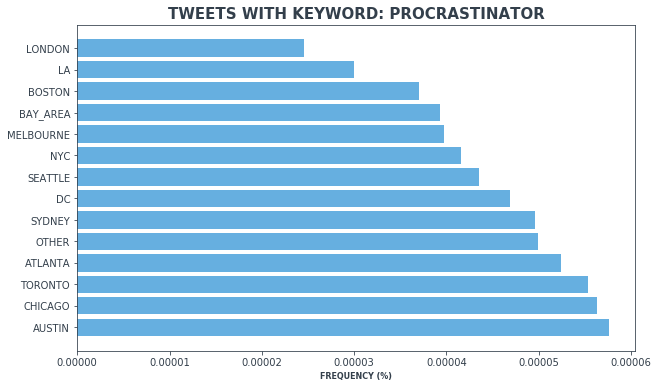

<Figure size 432x288 with 0 Axes>

In [11]:
# keywords = ['god', 'dating', 'art', 'celebrity', 'burrito', 'lonely',
#             'coffee', 'sex', 'equality', 'racism', 'tinder', 'metoo',
#             'trump', 'lgbt', 'transportation', 'future', 'gentrification',
#             'homeless', 'football', 'blockchain', 'money', 'startup', 'vc',
#             'book', 'tv', 'travel', 'crossfit', 'vegan', 'diet', 'boba']
keywords = ['procrastinator']
rank_cities_by_keyword('tweets', keywords, 'images/cities_by_keyword')

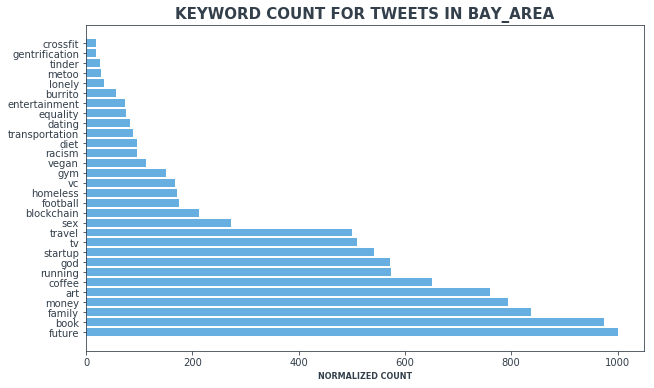

<Figure size 432x288 with 0 Axes>

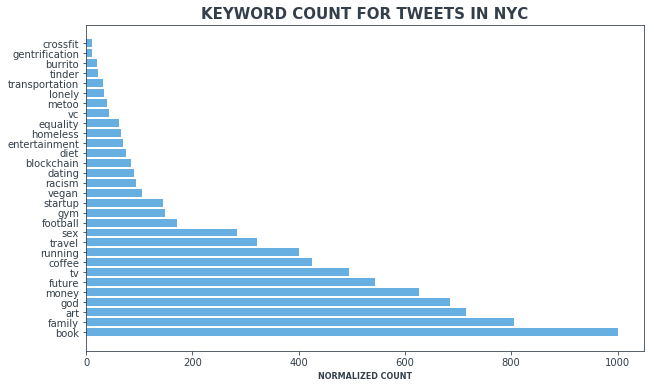

<Figure size 432x288 with 0 Axes>

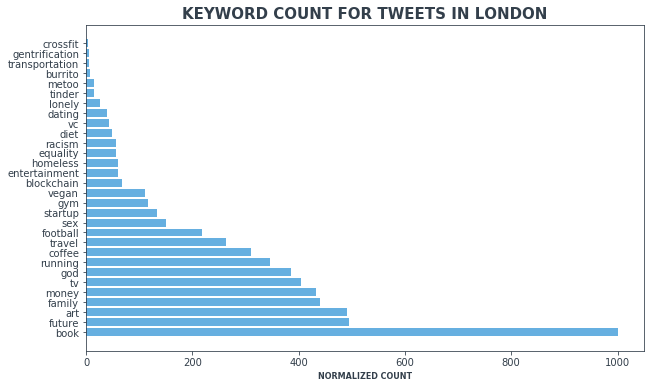

<Figure size 432x288 with 0 Axes>

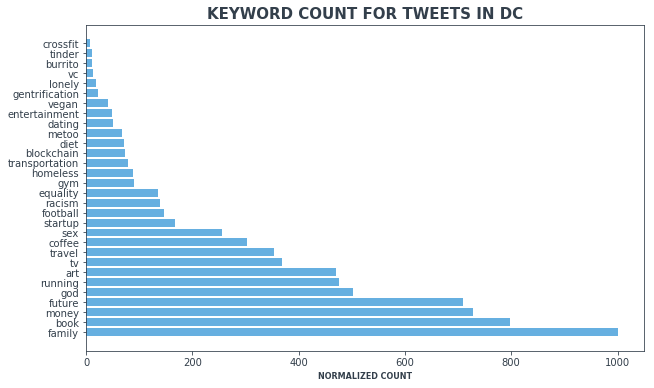

<Figure size 432x288 with 0 Axes>

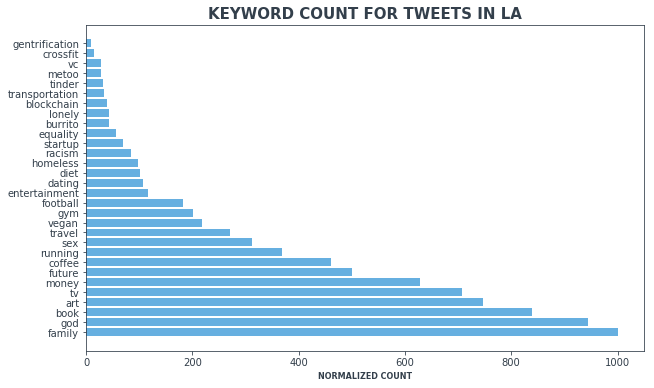

<Figure size 432x288 with 0 Axes>

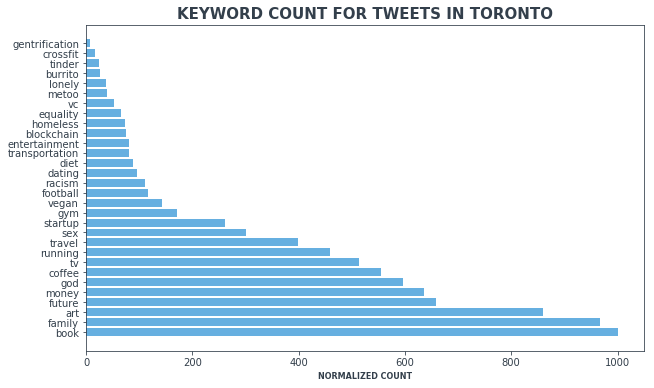

<Figure size 432x288 with 0 Axes>

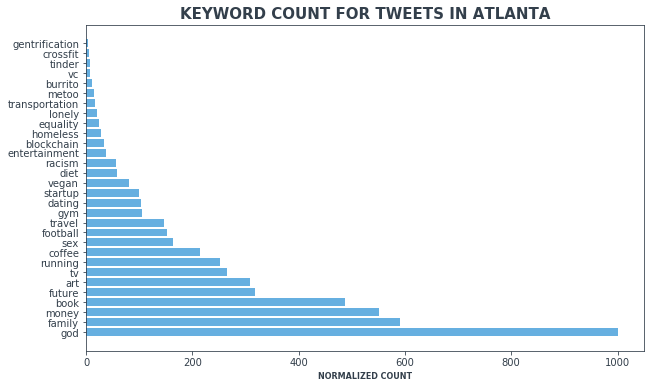

<Figure size 432x288 with 0 Axes>

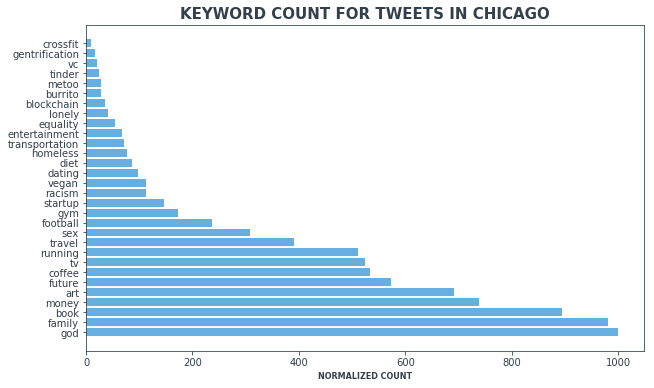

<Figure size 432x288 with 0 Axes>

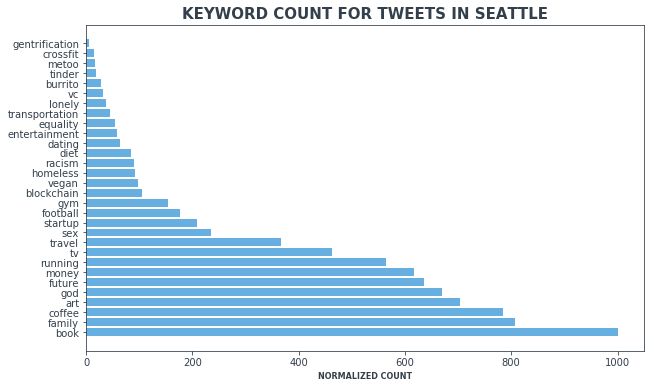

<Figure size 432x288 with 0 Axes>

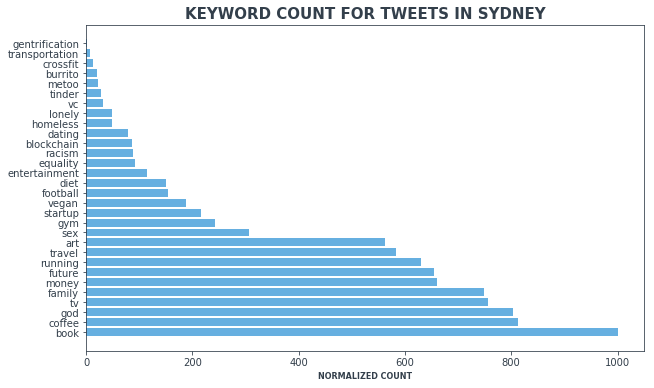

<Figure size 432x288 with 0 Axes>

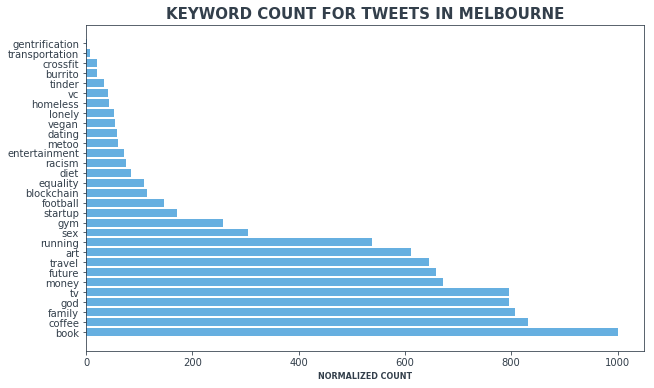

<Figure size 432x288 with 0 Axes>

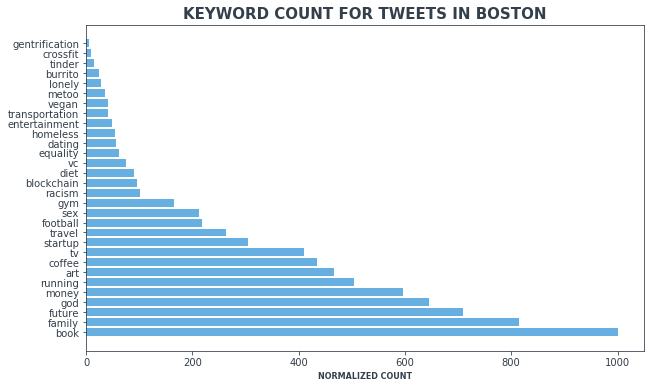

<Figure size 432x288 with 0 Axes>

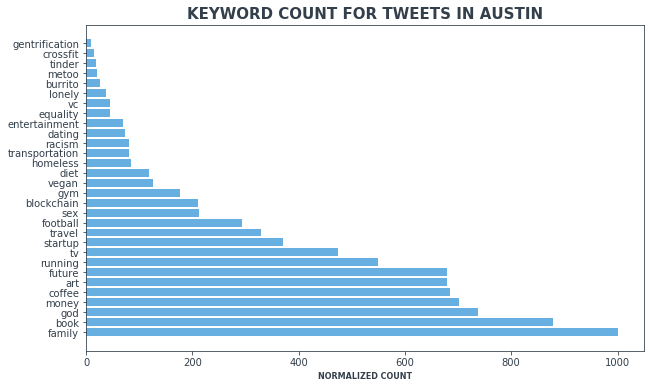

<Figure size 432x288 with 0 Axes>

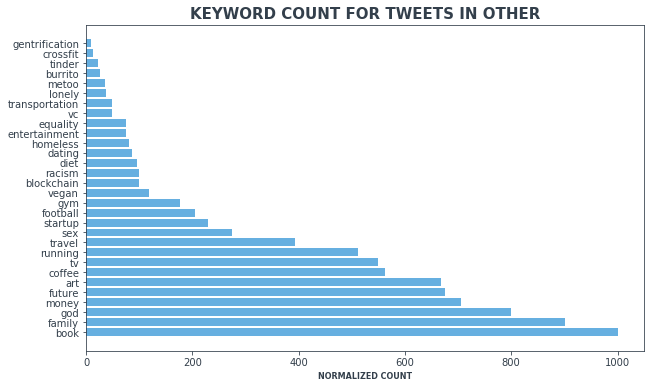

<Figure size 432x288 with 0 Axes>

In [12]:
keywords = ['god', 'family', 'dating', 'art', 'entertainment',
            'burrito', 'lonely', 'coffee', 'sex', 'equality', 'racism', 'tinder', 'metoo',
            'transportation', 'future', 'gentrification', 'homeless', 'football',
            'blockchain', 'money', 'startup', 'vc', 'book', 'tv', 'travel',
            'crossfit', 'gym', 'vegan', 'diet', 'running']
rank_keywords_in_city('tweets', keywords, 'images/keywords_in_city')

In [13]:
def rank_cities_by_multiple_keywords(sub, keywords, outfold='images/cities_by_keywords', cities=CITIES):
    if len(keywords)> 5:
        print('Too many keywords. The plot will get crowded')
    values = []
    for kw in keywords:
        current_values = []
        for city in cities:
            if not kw in vocabs[sub][city]:
                value = 100 / totals[sub][city]
            else:
                value = 100 * (vocabs[sub][city][kw] + 1) / totals[sub][city]
            current_values.append(value)
        values.append(current_values)
    width = 0.15
    ind = []
    
    for i in range(len(keywords)):
        ind.append([j + width * i for j in range(len(cities))])

    fig = plt.figure(figsize=(15, 10))
    p = []
    for i in range(len(ind)):
        p.append(plt.bar(ind[i], values[i], width))

    plt.ylabel('Percentage')
    plt.title('Cities by popularity of keywords in {}'.format(sub).upper())
    plt.xticks([i + width * (len(keywords) - 1) / 2 for i in ind[0]], cities)
    plt.legend([p[i][0] for i in range(len(p))], keywords)
    
    plt.show()

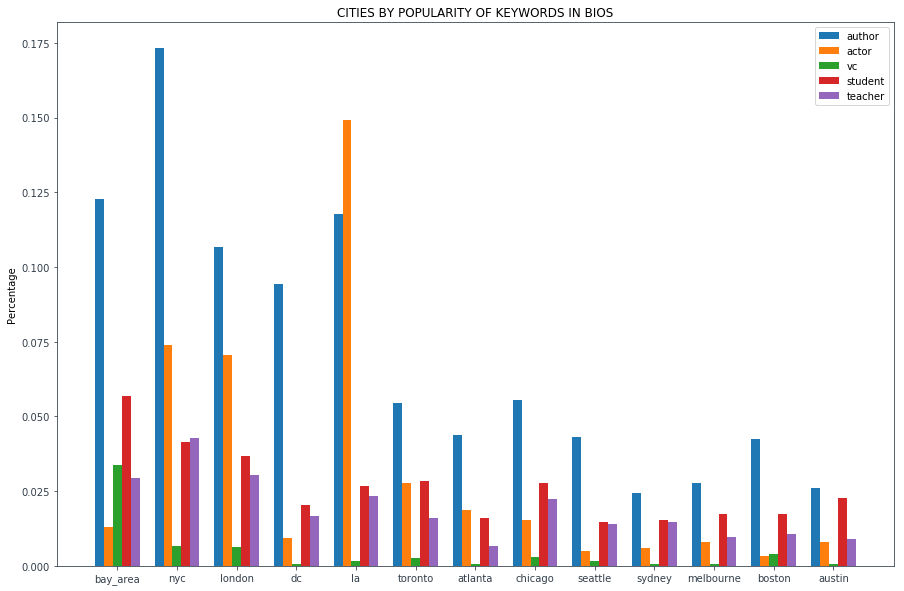

In [14]:
rank_cities_by_multiple_keywords('bios', ['author', 'actor', 'vc', 'student', 'teacher', ], outfold='images/cities_by_keywords', cities=CITIES)

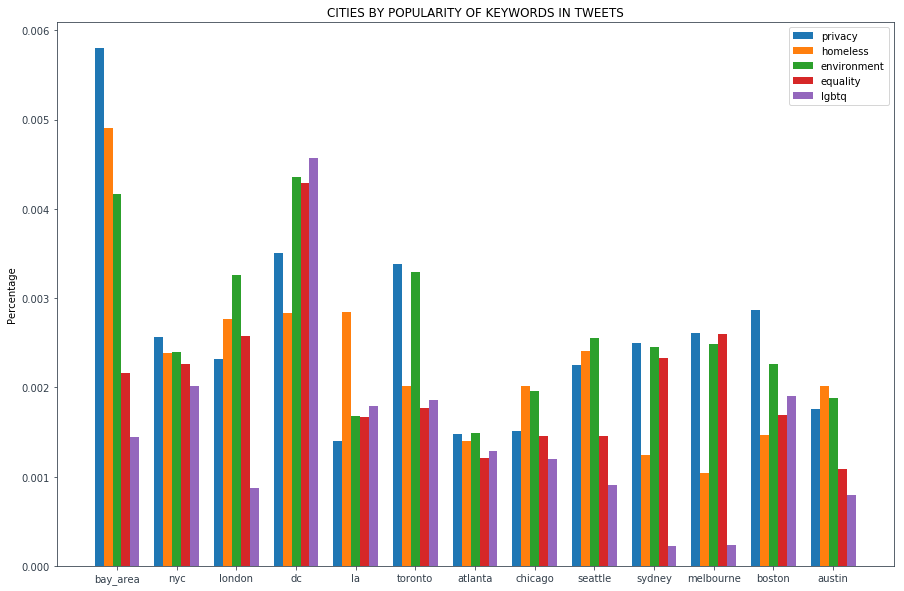

In [22]:
rank_cities_by_multiple_keywords('tweets', ['privacy', 'homeless', 'environment', 'equality', 'lgbtq'], outfold='images/cities_by_keywords', cities=CITIES)

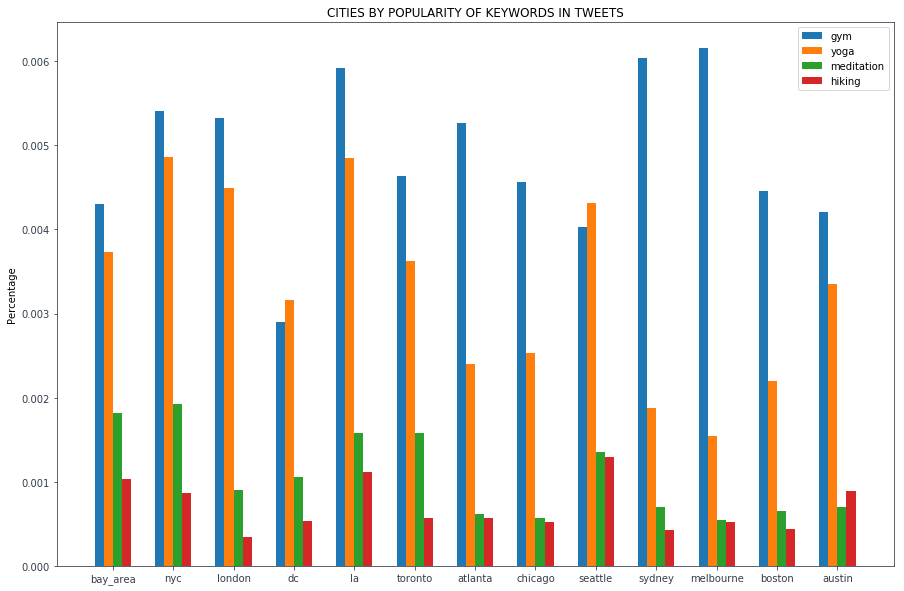

In [16]:
rank_cities_by_multiple_keywords('tweets', ['gym', 'yoga', 'meditation', 'hiking'], outfold='images/cities_by_keywords', cities=CITIES)

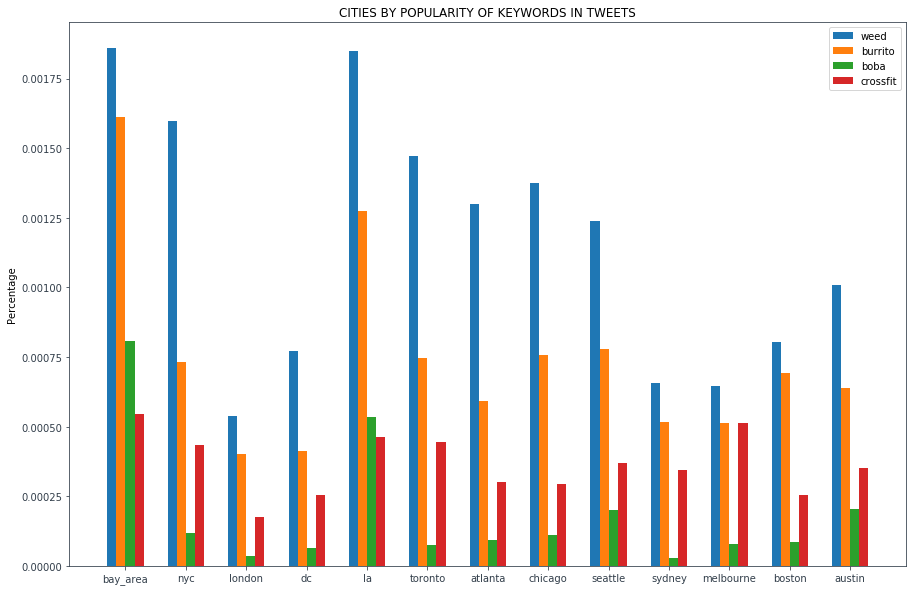

In [17]:
rank_cities_by_multiple_keywords('tweets', ['weed', 'burrito', 'boba', 'crossfit'], outfold='images/cities_by_keywords', cities=CITIES)

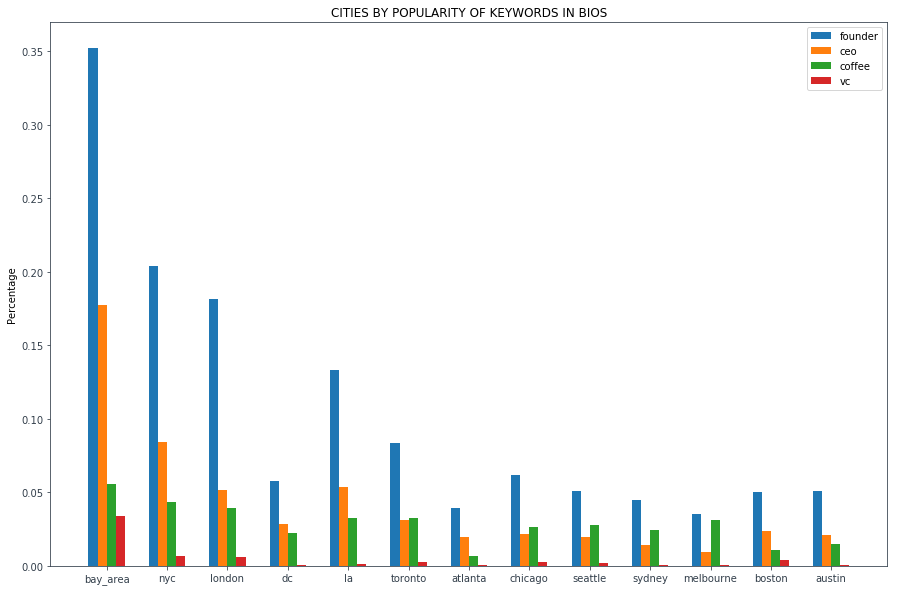

In [18]:
rank_cities_by_multiple_keywords('bios', ['founder', 'ceo', 'coffee', 'vc'], outfold='images/cities_by_keywords', cities=CITIES)